<a href="https://colab.research.google.com/github/Faizaa01/Python-for-ML/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a=set(input().split())
b=set(input().split())
# a = {"Rahim", "Karim", "Sakib", "Jamal"}
# b = {"Sakib", "Jamal", "Rafiq", "Nadim"}

print(f"Mutual Friends : {a.intersection(b)}")
print(f"Unique to A : {a.difference(b)}")
print(f"Unique to B : {b.difference(a)}")
print(f"Total Unique Friends : {len(a.union(b))}")


Rahim Karim Sakib Jamal
Sakib Jamal Rafiq Nadim
Mutual Friends : {'Jamal', 'Sakib'}
Unique to A : {'Rahim', 'Karim'}
Unique to B : {'Nadim', 'Rafiq'}
Total Unique Friends : 6


In [ ]:
# n = int(input("Enter number of students: "))
# students = []
# for i in range(n):
#     name = input(f"Enter name of student {i+1}: ")
#     mark = int(input(f"Enter mark of {name}: "))
#     students.append((name, mark))

s = [("Rafi", 89), ("Sumi", 95), ("Hasan", 90), ("Nila", 75), ("Anik", 98)]

sorted_students = sorted(s, key=lambda x: x[1], reverse=True)
top_3 = sorted_students[:3]

print("Top 3 students:")
for name, mark in top_3:
    print(f"{name} - {mark}")


Top 3 students:
Anik - 98
Sumi - 95
Hasan - 90


In [ ]:
# words = input().split()
words = ["sun", "planet", "moon", "star", "universe"]

x = list(filter(lambda x:len(x)>4, words))
print(x)


['planet', 'universe']


In [ ]:
# nums = list(map(int, input().split()))
nums = [1, 2, 3, 4, 5, 6]
ans = list(map(lambda x:x**2, filter(lambda x:x%2==0, nums)))
print(ans)

[4, 16, 36]


 Smart Vehicle Classifier

In [ ]:
class Vehicle():
  def __init__(self, v_type, name, speed):
    self._v_type = v_type
    self.__name = name
    self.__speed = speed
    print(f"{v_type} added: {name}")


  def type_getter(self):
    return self.__v_type
  def name_getter(self):
    return self.__name
  def speed_getter(self):
    return self.__speed


  def classify(self):
    if(self.__speed>100):
      return "High-Speed Vehicle"
    else:
      return "Normal Vehicle"

  def show_info(self):
        pass


class Car(Vehicle):
  def __init__(self, name, speed):
    super().__init__("Car", name, speed)

  def show_info(self):
    print(f"Type: Car, Name: {self.name_getter()}, Speed: {self.speed_getter()} km/h, Predicted: {self.classify()}")

class Bike(Vehicle):
  def __init__(self, name, speed):
    super().__init__("Bike", name, speed)

  def show_info(self):
    print(f"Type: Bike, Name: {self.name_getter()}, Speed: {self.speed_getter()} km/h, Predicted: {self.classify()}")

n = int(input())
vehicles = []
inputs = []
for _ in range(n):
    inputs.append(input().split())

for data in inputs:
    v_type, name, speed = data[0], data[1], int(data[2])
    if v_type == "Car":
        obj = Car(name, speed)
    elif v_type == "Bike":
        obj = Bike(name, speed)
    vehicles.append(obj)

print("\n--- Vehicle Details ---")
for v in vehicles:
    v.show_info()


3
Car Honda 150
Bike Yamaha 90
Car Toyota 120
Car added: Honda
Bike added: Yamaha
Car added: Toyota

--- Vehicle Details ---
Type: Car, Name: Honda, Speed: 150 km/h, Predicted: High-Speed Vehicle
Type: Bike, Name: Yamaha, Speed: 90 km/h, Predicted: Normal Vehicle
Type: Car, Name: Toyota, Speed: 120 km/h, Predicted: High-Speed Vehicle


In [ ]:
import numpy as np
import pandas as pd
rng = np.random.default_rng(42)
def generate_students(n=200, seed=42):
  rng = np.random.default_rng(seed)
  hours_studied = rng.normal(5, 2, n).clip(1, 10)
  marks = (hours_studied * rng.uniform(8, 12, n) + rng.normal(0, 5, n)).clip(30, 100)
  gender = rng.choice(['Male', 'Female'], n)
  subject = rng.choice(['Math', 'Science', 'English', 'History'], n)
  study_method = rng.choice(['Solo', 'Group'], n, p=[0.6, 0.4])
  attempts = rng.integers(1, 4, n)
  return pd.DataFrame({
     	'hours_studied': hours_studied.round(2),
     	'marks': marks.round(2),
     	'gender': gender,
     	'subject': subject,
     	'study_method': study_method,
     	'attempts': attempts
 	})

def generate_daily_sales(n=60, seed=42):
  rng = np.random.default_rng(seed)
  base = pd.date_range(start='2024-01-01', periods=n, freq='D')
  trend = np.linspace(50, 80, n)
  season = 8 * np.sin(np.linspace(0, 3*np.pi, n))
  noise = rng.normal(0, 3, n)
  sales = (trend + season + noise).round(2)
  return pd.DataFrame({'date': base, 'sales': sales})

# Example usage
students = generate_students(50)
sales = generate_daily_sales(50)


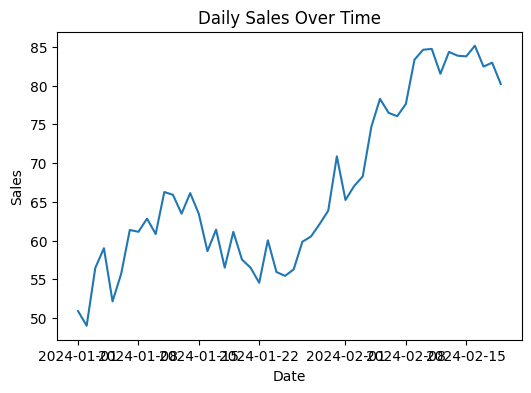

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# ---------- 1. Lineplot of date vs sales ----------
plt.figure(figsize=(6,4))
sns.lineplot(x='date', y='sales', data=sales)
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

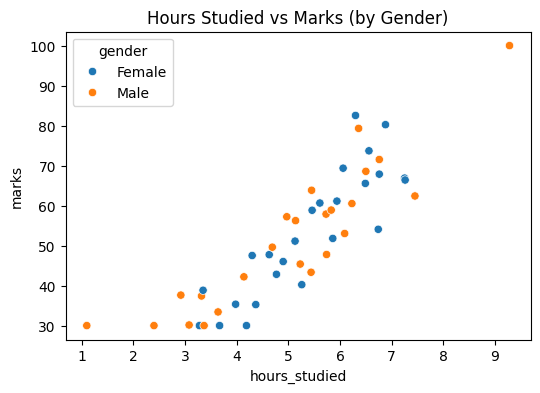

In [ ]:
# ---------- 2. from students, plot hours_studied vs marks and color by gender ----------
plt.figure(figsize=(6,4))
sns.scatterplot(x='hours_studied', y='marks', hue='gender', data=students)
plt.title("Hours Studied vs Marks (by Gender)")
plt.show()

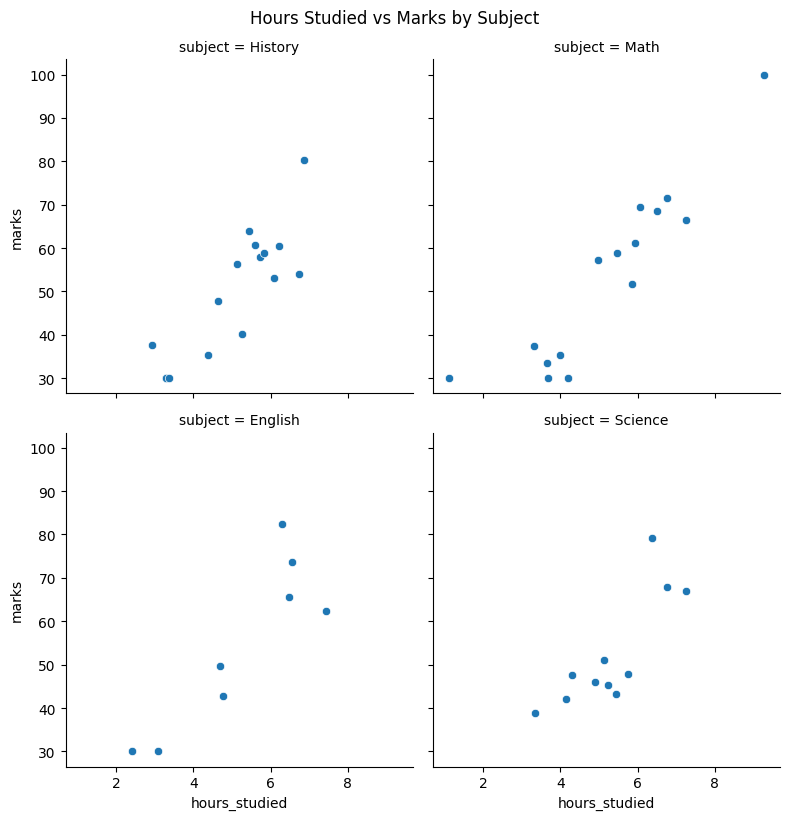

In [ ]:
# ---------- 3. Create a grid of scatterplots (hours_studied vs marks) faceted by subject----------
g = sns.FacetGrid(students, col='subject', col_wrap=2, height=4)
g.map_dataframe(sns.scatterplot, x='hours_studied', y='marks')
g.fig.suptitle("Hours Studied vs Marks by Subject", y=1.02)
plt.show()

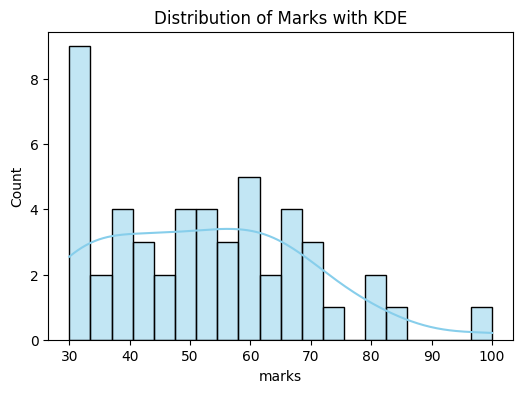

In [ ]:
# ---------- 4. Histogram of marks with KDE overlay ----------
plt.figure(figsize=(6,4))
sns.histplot(students['marks'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Marks with KDE")
plt.show()

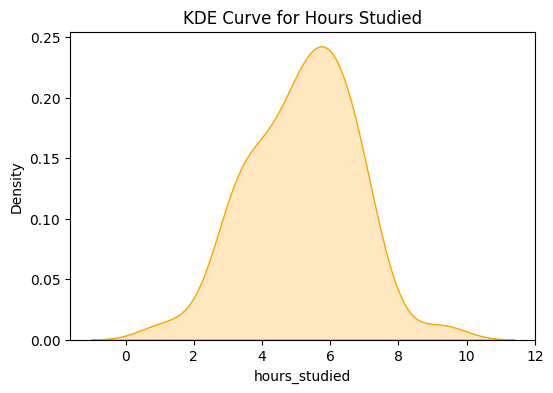

In [ ]:
# ---------- 5. KDE curve for hours_studied ----------
plt.figure(figsize=(6,4))
sns.kdeplot(students['hours_studied'], fill=True, color='orange')
plt.title("KDE Curve for Hours Studied")
plt.show()

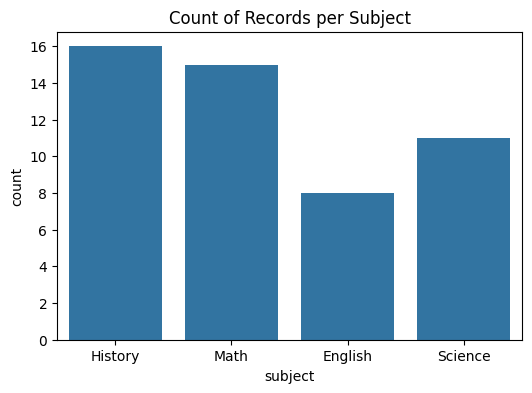

In [ ]:
# ---------- 6. Count of records per subject ----------
plt.figure(figsize=(6,4))
sns.countplot(x='subject', data=students)
plt.title("Count of Records per Subject")
plt.show()

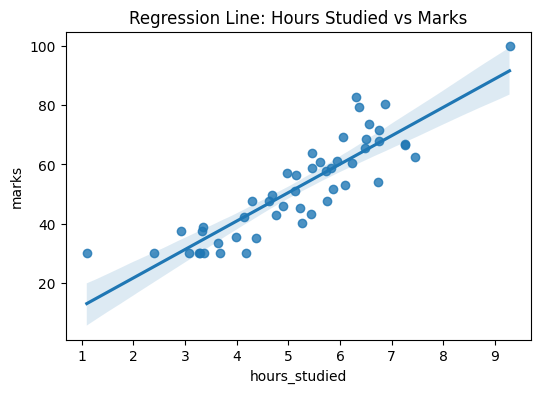

In [ ]:
# ---------- 7. Regression line for hours_studied vs marks ----------
plt.figure(figsize=(6,4))
sns.regplot(x='hours_studied', y='marks', data=students)
plt.title("Regression Line: Hours Studied vs Marks")
plt.show()

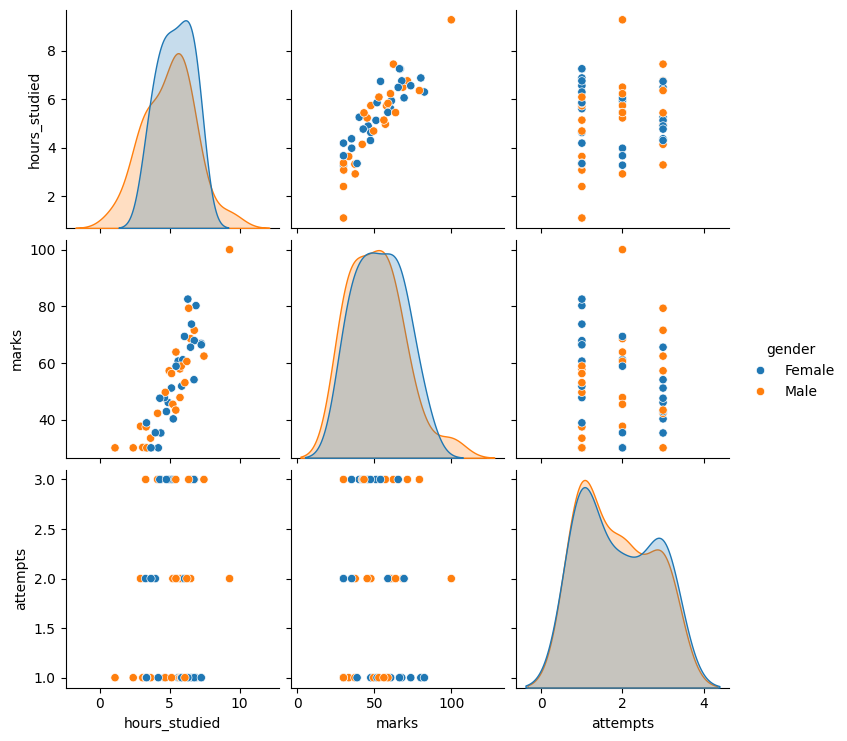

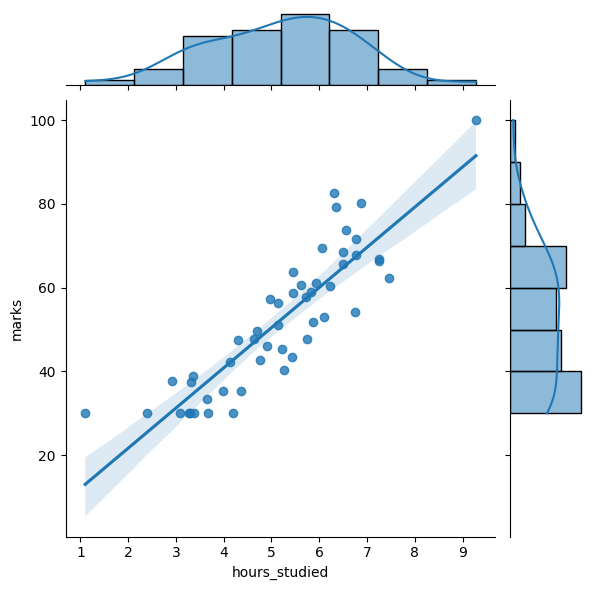

In [ ]:
sns.pairplot(students[['hours_studied', 'marks', 'attempts', 'gender']], hue='gender')
plt.show()

sns.jointplot(x='hours_studied', y='marks', data=students, kind='reg', height=6)
plt.show()

In [ ]:
import plotly.express as px
# ---------- 9. Plotly scatter (hours_studied vs marks, color by gender) ----------
fig1 = px.scatter(students, x='hours_studied', y='marks', color='gender',
                  title='Hours Studied vs Marks (Plotly Interactive)')
fig1.show()

In [ ]:
# ---------- 10. Plotly line chart (sales) + histogram (marks) ----------
fig2 = px.line(sales, x='date', y='sales', title='Sales Over Time (Plotly)')
fig2.show()

fig3 = px.histogram(students, x='marks', nbins=20, title='Marks Distribution (Plotly)', color='gender')
fig3.show()